In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib notebook

In [6]:
# Set hyper parameter & initial value
Epoch = 100

width = 256
height = 256
temperature = 1

all_spins = []
spin_arr = (np.random.randint(0, 2, (height, width)) * 2) - 1
temp_arr = spin_arr
all_spins.append(spin_arr * np.ones(spin_arr.shape))

In [7]:
# Define plot function
class Explorer(object):
    def __init__(self, data):
        self.data = data
        nz = self.data.shape[0] - 1

        self.fig, self.ax = plt.subplots()
        self.ax.set_title('Ising model_plots')

        self.sliderax = self.fig.add_axes([0.2, 0.02, 0.65, 0.04])
        self.slider = Slider(self.sliderax, 'Time', 0, nz, valinit=0, valstep = 1)
        self.slider.on_changed(self.update)

        self.im = self.ax.pcolormesh(data[0,:,:], vmin=data.min(), vmax=data.max(), cmap=plt.cm.gray)

    def update(self, i):
        self.im.set_array(self.data[int(i),:,:].ravel())
        self.fig.canvas.draw()

    def show(self):
        plt.show()

Time frame: 0 ~ 10 완료!
Time frame: 0 ~ 20 완료!
Time frame: 0 ~ 30 완료!
Time frame: 0 ~ 40 완료!
Time frame: 0 ~ 50 완료!
Time frame: 0 ~ 60 완료!
Time frame: 0 ~ 70 완료!
Time frame: 0 ~ 80 완료!
Time frame: 0 ~ 90 완료!
Time frame: 0 ~ 100 완료!


<IPython.core.display.Javascript object>


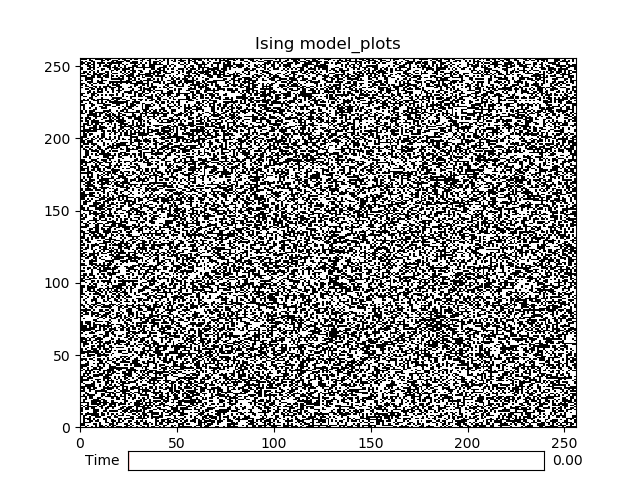

In [8]:
for time in range(1, Epoch + 1):
    for i in range(height):
        for j in range(width):
            # Set initial value using in the loop
            ising_consider = 0
            energy = 0

            # Index overflow check
            if (i - 1) >= 0:
                ising_consider += spin_arr[i - 1][j]
            if (i + 1) <= (height - 1):
                ising_consider += spin_arr[i + 1][j]
            if (j - 1) >= 0:
                ising_consider += spin_arr[i][j - 1]
            if (j + 1) <= (width - 1):
                ising_consider += spin_arr[i][j + 1]

            # Applying Monte Carlo method 
            energy = - spin_arr[i][j] * ising_consider
            if energy > 0:
                temp_arr[i][j] = - spin_arr[i][j]
            elif np.random.random() < np.exp(2 * energy / temperature):
                temp_arr[i][j] = - spin_arr[i][j]

    spin_arr = temp_arr
    all_spins.append(spin_arr * np.ones(spin_arr.shape))
    if (time % 10) == 0: print('Time frame: 0 ~ %d 완료!' % time)

all_spins = np.array(all_spins)
ex = Explorer(all_spins)
ex.show()